# Word2Vec Demos

In [1]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the pre-trained word2vec model
model = api.load("word2vec-google-news-300")

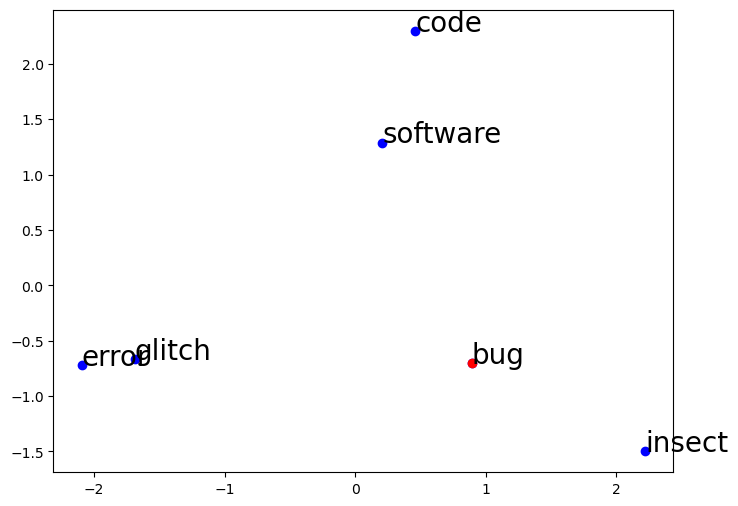

In [2]:
# Words to visualize
words = ['bug', 'insect', 'error', 'code', 'software', 'glitch']

# Extract the word vectors
vectors = np.array([model[word] for word in words])

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color='blue')

for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=20)

# Change bug to red
plt.scatter(reduced_vectors[0, 0], reduced_vectors[0, 1], color='red')

plt.show()


In [3]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

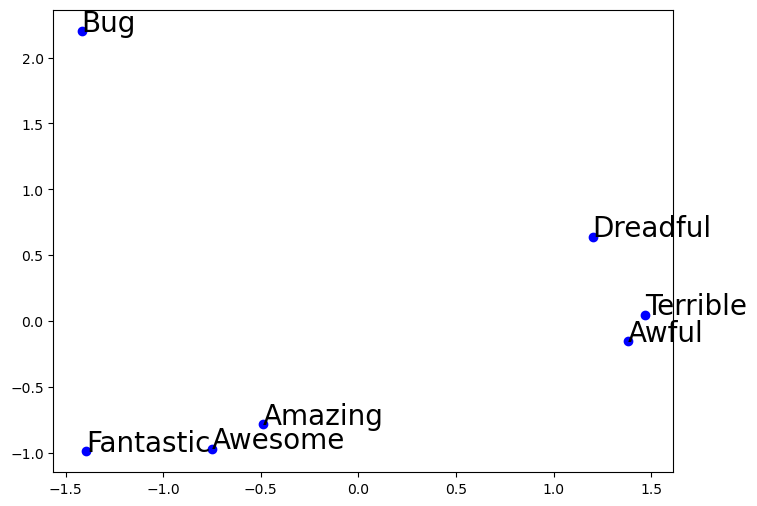

In [47]:
# Words to visualize
words = ['Fantastic', 'Awesome', 'Amazing', 'Dreadful', 'Terrible', 'Awful', 'Bug']

# Extract the word vectors
vectors = np.array([model[word] for word in words])

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)

reduced_vectors = pca.fit_transform(vectors)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color='blue')

for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=20)

plt.show()


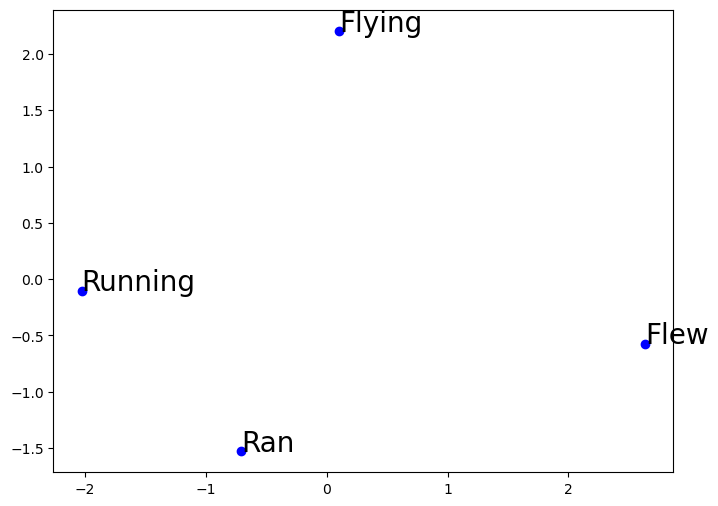

In [5]:
# Words to visualize
words = ['Flew', 'Flying', 'Ran', 'Running']

# Extract the word vectors
vectors = np.array([model[word] for word in words])

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)

reduced_vectors = pca.fit_transform(vectors)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color='blue')

for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=20)

plt.show()


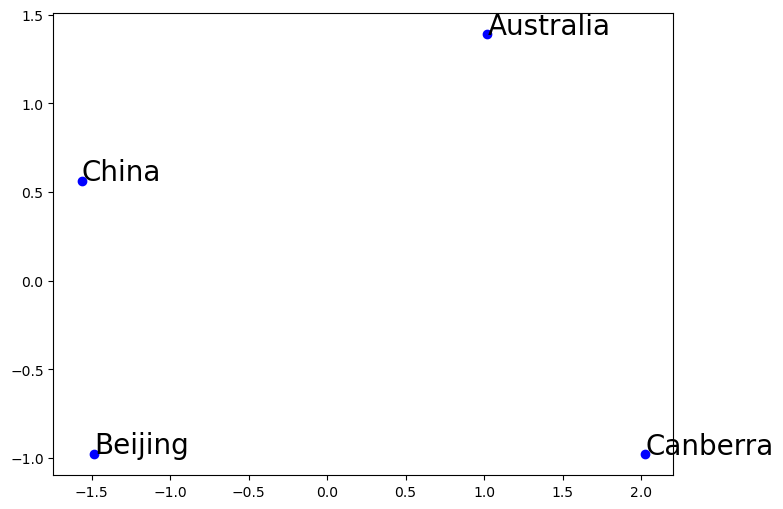

In [6]:
# Words to visualize
words = ['Australia', 'China', 'Canberra', 'Beijing']

# Extract the word vectors
vectors = np.array([model[word] for word in words])

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)

reduced_vectors = pca.fit_transform(vectors)

pca_components = pca.components_
pca_mean = pca.mean_

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color='blue')

for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=20)

plt.show()


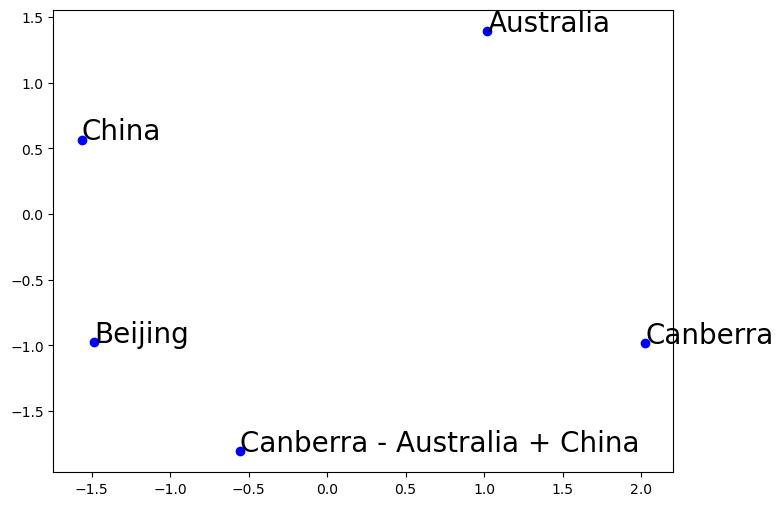

In [7]:
words = ['Australia', 'China', 'Canberra', 'Beijing']
# Step 2: Perform vector arithmetic
result_vector = model['Canberra'] - model['Australia'] + model['China']

# Step 3: Project the result vector into the existing PCA space
def project_new_vector(new_vector):
    centered_vector = new_vector - pca_mean
    return np.dot(centered_vector, pca_components.T)

# Project the result vector into the PCA space
projected_result = project_new_vector(result_vector)
# Combine the reduced original vectors with the new projected result
all_reduced_vectors = np.vstack([reduced_vectors, projected_result])
words.append('Canberra - Australia + China')

# Step 4: Plotting
plt.figure(figsize=(8, 6))
plt.scatter(all_reduced_vectors[:, 0], all_reduced_vectors[:, 1], color='blue')

for i, word in enumerate(words):
    plt.annotate(word, (all_reduced_vectors[i, 0], all_reduced_vectors[i, 1]), fontsize=20)

plt.show()


In [8]:
# Perform vector arithmetic for Canberra - Australia + China
model.most_similar(model['Canberra'] - model['Australia'] + model['China'], topn=5)

[('Beijing', 0.742388904094696),
 ('China', 0.6592058539390564),
 ('Canberra', 0.6468576788902283),
 ('Chinese', 0.6212753057479858),
 ('Beijng', 0.6106800436973572)]

In [9]:
# Perform vector arithmetic for king - man + woman
model.most_similar(model['king'] - model['man'] + model['woman'], topn=5)

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916)]

# Distributional Hypothesis

/home/lbluett/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


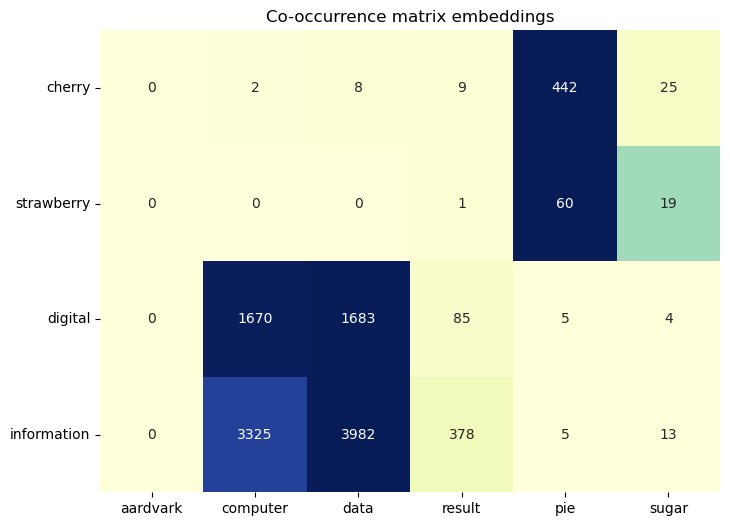

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

words = ["cherry", "strawberry", "digital", "information"]
context_words = ["aardvark","computer", "data", "result", "pie", "sugar"]

# Original co-occurrence matrix
co_occurrences = np.array([
    [0, 2, 8, 9, 442, 25],
    [0, 0, 0, 1, 60, 19],
    [0, 1670, 1683, 85, 5, 4],
    [0, 3325, 3982, 378, 5, 13]
])

# Normalize each row by dividing by the row's total sum
normalized_co_occurrences = co_occurrences / co_occurrences.max(axis=1, keepdims=True)

# Create a DataFrame with normalized values
df = pd.DataFrame(normalized_co_occurrences, index=words, columns=context_words)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=co_occurrences, fmt="g", cmap="YlGnBu", cbar=False)
plt.yticks(rotation=0)
plt.title("Co-occurrence matrix embeddings")
plt.show()


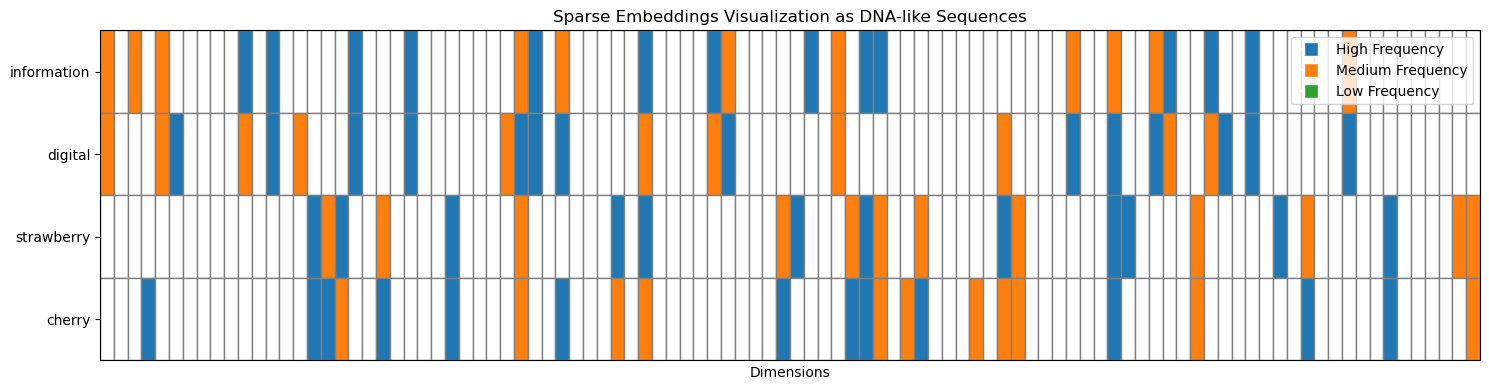

In [11]:
import numpy as np

# Set embedding size (e.g., 100 dimensions)
embedding_size = 100

# Initialize embeddings with zeros
words = ['information', 'digital', 'strawberry', 'cherry']
embeddings = {word: np.zeros(embedding_size) for word in words}

# Create overlapping indices for similar words
np.random.seed(42)  # For reproducibility
overlap_info_digital = np.random.choice(embedding_size, size=20, replace=False)
overlap_strawberry_cherry = np.random.choice(embedding_size, size=20, replace=False)

# Assign random values to overlapping dimensions
for idx in overlap_info_digital:
    embeddings['information'][idx] = np.random.rand() + 1  # +1 to ensure higher frequency
    embeddings['digital'][idx] = np.random.rand() + 1

for idx in overlap_strawberry_cherry:
    embeddings['strawberry'][idx] = np.random.rand() + 1
    embeddings['cherry'][idx] = np.random.rand() + 1

# Introduce some unique high-frequency dimensions
embeddings['information'][np.random.choice(embedding_size, size=5, replace=False)] = np.random.rand(5) + 1
embeddings['digital'][np.random.choice(embedding_size, size=5, replace=False)] = np.random.rand(5) + 1
embeddings['strawberry'][np.random.choice(embedding_size, size=5, replace=False)] = np.random.rand(5) + 1
embeddings['cherry'][np.random.choice(embedding_size, size=5, replace=False)] = np.random.rand(5) + 1


import matplotlib.colors as mcolors

# Define value ranges and corresponding colors
value_ranges = {
    'high': {'min': 1.5, 'color': '#1f77b4'},  # Blue
    'medium': {'min': 1.0, 'color': '#ff7f0e'},  # Orange
    'low': {'min': 0.5, 'color': '#2ca02c'},  # Green
    'zero': {'min': 0.0, 'color': '#ffffff'}  # White
}

# Function to map values to colors
def value_to_color(value):
    for category in value_ranges.values():
        if value >= category['min']:
            return category['color']
    return value_ranges['zero']['color']


import matplotlib.pyplot as plt

def plot_embeddings_as_sequences(embeddings):
    words = list(embeddings.keys())
    num_words = len(words)
    embedding_length = len(next(iter(embeddings.values())))
    fig, ax = plt.subplots(figsize=(15, num_words))

    for idx, word in enumerate(words):
        embedding = embeddings[word]
        colors = [value_to_color(val) for val in embedding]
        # Create a colored rectangle for each dimension
        for dim, color in enumerate(colors):
            rect = plt.Rectangle((dim, num_words - idx - 1), 1, 1, facecolor=color, edgecolor='grey')
            ax.add_patch(rect)

    # Set limits and labels
    ax.set_xlim(0, embedding_length)
    ax.set_ylim(0, num_words)
    ax.set_yticks([num_words - i - 0.5 for i in range(num_words)])
    ax.set_yticklabels(words)
    ax.set_xticks([])
    ax.set_xlabel('Dimensions')
    ax.set_title('Sparse Embeddings Visualization as DNA-like Sequences')

    # Create a legend
    legend_elements = [
        plt.Line2D([0], [0], marker='s', color='w', label='High Frequency', markerfacecolor=value_ranges['high']['color'], markersize=10),
        plt.Line2D([0], [0], marker='s', color='w', label='Medium Frequency', markerfacecolor=value_ranges['medium']['color'], markersize=10),
        plt.Line2D([0], [0], marker='s', color='w', label='Low Frequency', markerfacecolor=value_ranges['low']['color'], markersize=10),
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    plt.tight_layout()
    plt.show()

plot_embeddings_as_sequences(embeddings)


# Sum non-zero occurrences across words for each dimension
dimension_activity = np.sum([emb > 0 for emb in embeddings.values()], axis=0)
# Get indices that sort dimensions by activity
sorted_indices = np.argsort(-dimension_activity)

# Reorder embeddings
for word in embeddings:
    embeddings[word] = embeddings[word][sorted_indices]


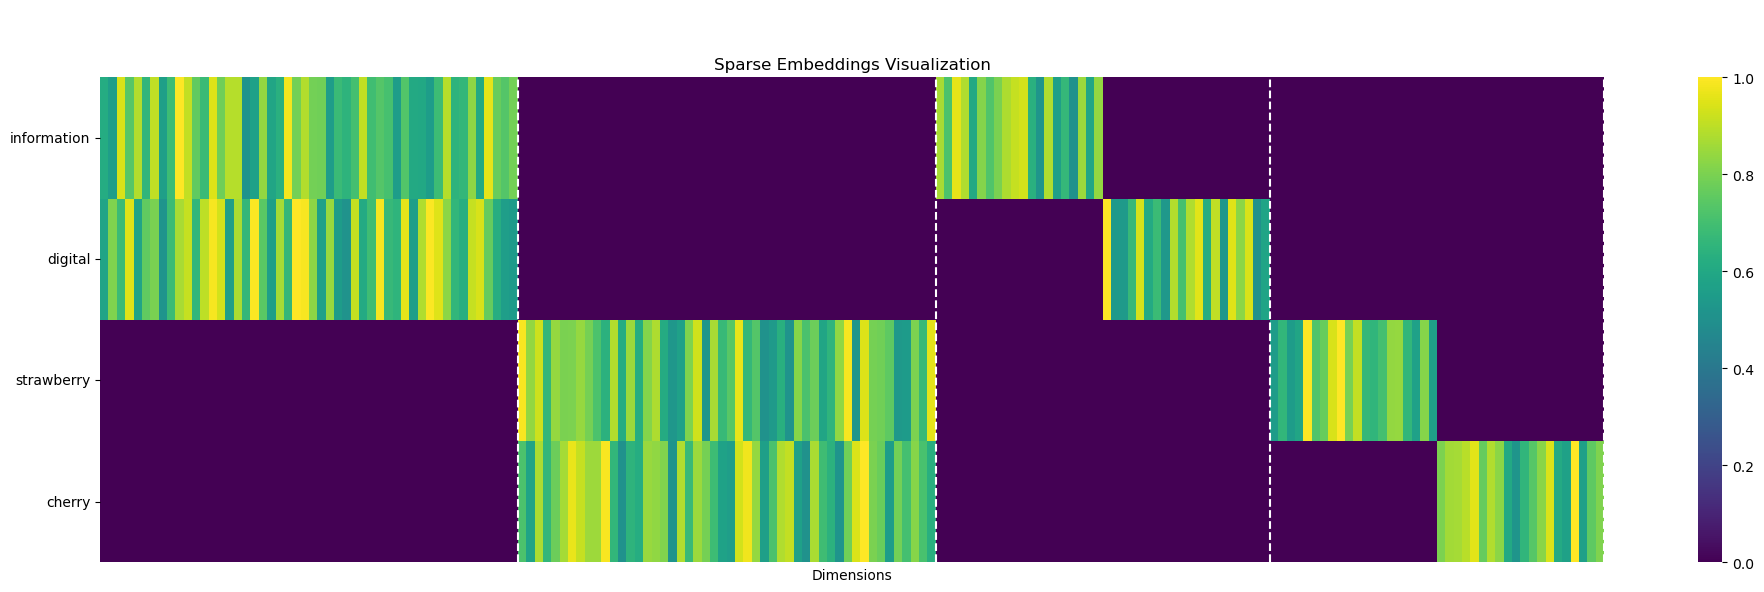

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Embedding parameters
embedding_size = 1000
shared_dims = 50
unique_dims = 20

embeddings = {
    'information': np.zeros(embedding_size),
    'digital': np.zeros(embedding_size),
    'strawberry': np.zeros(embedding_size),
    'cherry': np.zeros(embedding_size)
}

np.random.seed(42)

def assign_values(word1, word2, shared_indices, unique_indices1, unique_indices2):
    embeddings[word1][shared_indices] = np.random.rand(shared_dims) + 1
    embeddings[word2][shared_indices] = np.random.rand(shared_dims) + 1
    embeddings[word1][unique_indices1] = np.random.rand(unique_dims) + 1
    embeddings[word2][unique_indices2] = np.random.rand(unique_dims) + 1

all_indices = np.arange(embedding_size)
used_indices = set()

# 'information' and 'digital'
shared_info_digital = np.random.choice(all_indices, size=shared_dims, replace=False)
used_indices.update(shared_info_digital)

remaining_indices = np.array(list(set(all_indices) - used_indices))
unique_info = np.random.choice(remaining_indices, size=unique_dims, replace=False)
used_indices.update(unique_info)

remaining_indices = np.array(list(set(all_indices) - used_indices))
unique_digital = np.random.choice(remaining_indices, size=unique_dims, replace=False)
used_indices.update(unique_digital)

assign_values('information', 'digital', shared_info_digital, unique_info, unique_digital)

# 'strawberry' and 'cherry'
remaining_indices = np.array(list(set(all_indices) - used_indices))
shared_strawberry_cherry = np.random.choice(remaining_indices, size=shared_dims, replace=False)
used_indices.update(shared_strawberry_cherry)

remaining_indices = np.array(list(set(all_indices) - used_indices))
unique_strawberry = np.random.choice(remaining_indices, size=unique_dims, replace=False)
used_indices.update(unique_strawberry)

remaining_indices = np.array(list(set(all_indices) - used_indices))
unique_cherry = np.random.choice(remaining_indices, size=unique_dims, replace=False)
used_indices.update(unique_cherry)

assign_values('strawberry', 'cherry', shared_strawberry_cherry, unique_strawberry, unique_cherry)

# Create DataFrame
df_embeddings = pd.DataFrame(embeddings).transpose()

# Normalize embeddings
df_embeddings_normalized = df_embeddings.divide(df_embeddings.max(axis=1), axis=0)

# Reorder dimensions
ordered_indices = np.concatenate([
    shared_info_digital,
    shared_strawberry_cherry,
    unique_info,
    unique_digital,
    unique_strawberry,
    unique_cherry
])

df_embeddings_ordered = df_embeddings_normalized.iloc[:, ordered_indices]

# Plot heatmap
plt.figure(figsize=(20, 6))
ax = sns.heatmap(df_embeddings_ordered, cmap='viridis', cbar=True)
ax.set_xlabel('Dimensions')
# ax.set_ylabel('Words')
ax.set_title('Sparse Embeddings Visualization')
ax.set_xticks([])
ax.set_yticklabels(df_embeddings_ordered.index, rotation=0)

# Add vertical lines and labels
ax.axvline(x=shared_dims, color='white', linestyle='--')
ax.axvline(x=shared_dims*2, color='white', linestyle='--')
ax.axvline(x=shared_dims*2 + unique_dims*2, color='white', linestyle='--')
ax.axvline(x=shared_dims*2 + unique_dims*4, color='white', linestyle='--')

ax.text(shared_dims/2, -0.5, 'Info & Digital Shared', ha='center', va='center', color='white', fontsize=12)
ax.text(shared_dims + shared_dims/2, -0.5, 'Strawberry & Cherry Shared', ha='center', va='center', color='white', fontsize=12)
ax.text(shared_dims*2 + unique_dims, -0.5, 'Info & Digital Unique', ha='center', va='center', color='white', fontsize=12)
ax.text(shared_dims*2 + unique_dims*3, -0.5, 'Strawberry & Cherry Unique', ha='center', va='center', color='white', fontsize=12)

plt.tight_layout()
plt.show()


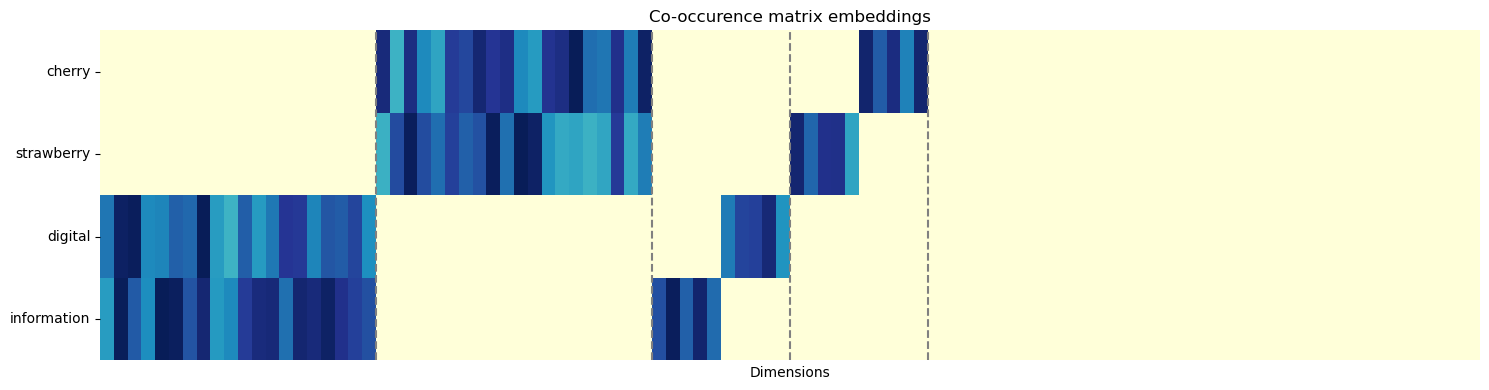

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Embedding parameters
embedding_size = 100  # Number of dimensions
shared_dims = 20      # Number of shared non-zero dimensions between similar words
unique_dims = 5       # Number of unique non-zero dimensions per word

embeddings = {
    'cherry': np.zeros(embedding_size),
    'strawberry': np.zeros(embedding_size),
    'digital': np.zeros(embedding_size),
    'information': np.zeros(embedding_size),
}

np.random.seed(42)

def assign_values(word1, word2, shared_indices, unique_indices1, unique_indices2):
    embeddings[word1][shared_indices] = np.random.rand(shared_dims) + 1
    embeddings[word2][shared_indices] = np.random.rand(shared_dims) + 1
    embeddings[word1][unique_indices1] = np.random.rand(unique_dims) + 1
    embeddings[word2][unique_indices2] = np.random.rand(unique_dims) + 1

all_indices = np.arange(embedding_size)
used_indices = set()

# 'information' and 'digital'
shared_info_digital = np.random.choice(all_indices, size=shared_dims, replace=False)
used_indices.update(shared_info_digital)

remaining_indices = np.array(list(set(all_indices) - used_indices))
unique_info = np.random.choice(remaining_indices, size=unique_dims, replace=False)
used_indices.update(unique_info)

remaining_indices = np.array(list(set(all_indices) - used_indices))
unique_digital = np.random.choice(remaining_indices, size=unique_dims, replace=False)
used_indices.update(unique_digital)

assign_values('information', 'digital', shared_info_digital, unique_info, unique_digital)

# 'strawberry' and 'cherry'
remaining_indices = np.array(list(set(all_indices) - used_indices))
shared_strawberry_cherry = np.random.choice(remaining_indices, size=shared_dims, replace=False)
used_indices.update(shared_strawberry_cherry)

remaining_indices = np.array(list(set(all_indices) - used_indices))
unique_strawberry = np.random.choice(remaining_indices, size=unique_dims, replace=False)
used_indices.update(unique_strawberry)

remaining_indices = np.array(list(set(all_indices) - used_indices))
unique_cherry = np.random.choice(remaining_indices, size=unique_dims, replace=False)
used_indices.update(unique_cherry)

assign_values('strawberry', 'cherry', shared_strawberry_cherry, unique_strawberry, unique_cherry)

# Convert embeddings to DataFrame
df_embeddings = pd.DataFrame(embeddings).transpose()

# Normalize embeddings
df_embeddings_normalized = df_embeddings.divide(df_embeddings.max(axis=1), axis=0)

# Reorder dimensions
ordered_indices = np.concatenate([
    shared_info_digital,
    shared_strawberry_cherry,
    unique_info,
    unique_digital,
    unique_strawberry,
    unique_cherry,
    np.array(list(set(all_indices) - used_indices))  # Remaining zero dimensions
])

df_embeddings_ordered = df_embeddings_normalized.iloc[:, ordered_indices]

# Plot heatmap
plt.figure(figsize=(15, 4))
ax = sns.heatmap(df_embeddings_ordered, annot=False, fmt="g", cmap="YlGnBu", cbar=False)
ax.set_xlabel('Dimensions')
# ax.set_ylabel('Words')
ax.set_title('Co-occurence matrix embeddings')
ax.set_xticks([])
ax.set_yticklabels(df_embeddings_ordered.index, rotation=0)

# Calculate positions for vertical lines and labels
section_ends = [
    shared_dims,
    shared_dims * 2,
    shared_dims * 2 + unique_dims * 2,
    shared_dims * 2 + unique_dims * 4
]

section_midpoints = [
    shared_dims / 2,
    shared_dims + shared_dims / 2,
    shared_dims * 2 + unique_dims,
    shared_dims * 2 + unique_dims * 3
]

# section_labels = [
#     'Info & Digital Shared',
#     'Strawberry & Cherry Shared',
#     'Info & Digital Unique',
#     'Strawberry & Cherry Unique'
# ]

# Add vertical lines to separate sections
for pos in section_ends:
    ax.axvline(x=pos, color='grey', linestyle='--')

# Add text labels for sections
# for midpoint, label in zip(section_midpoints, section_labels):
# for midpoint in section_midpoints:
#     ax.text(
#         midpoint,
#         -0.4,  # Adjusted position to prevent overlap
#         label = "",
#         ha='center',
#         va='center',
#         color='black',
#         fontsize=10,
#         bbox=dict(facecolor='white', edgecolor='none', pad=1)  # Add background for readability
#     )

plt.tight_layout()
plt.show()


# PyCon Speech Description Embeddings

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from sentence_transformers import SentenceTransformer, CrossEncoder, util
import torch

In [12]:
# Load the dataset
df = pd.read_csv('pycon_2024_sessions.csv')

# Load sentence transformer and cross-encoder models
sbert_model = SentenceTransformer('all-mpnet-base-v2')
cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

In [13]:
df['Title'] = df['Title'].str.replace("—PyCon AU 2024", "")

In [14]:
# Compute embeddings for all descriptions
embeddings = sbert_model.encode(df['Description'].tolist(), convert_to_tensor=True)

In [28]:
# Select the target speech's index to compare with
current_speech_idx = df[df['Title'] == 'Teaching Digital Technologies in Australian schools with Python and the Kookaberry'].index[0]
target_embedding = embeddings[current_speech_idx]

In [29]:
# Calculate cosine similarity between the target speech and all speeches
similarities = util.pytorch_cos_sim(target_embedding, embeddings).squeeze()

In [30]:
# Get initial top 10 most similar speeches excluding the target speech itself
top_10_indices = torch.topk(similarities, k=11).indices[1:].tolist()
top_10_similarities = similarities[top_10_indices].tolist()

In [31]:
df.iloc[top_10_indices]

,Title,Name,Description
50,Transitioning from VB to Python – Mapping a 6 ...,Pravin vaz,"In the past decade, this school has consistent..."
17,Enhancing Programming Ability with Playful Lea...,Stephen Tierney,Beginner programmers often struggle to underst...
31,Looking back to move forwards: how educational...,Alison Wong,Learning to program can be exceptionally chall...
34,MicroPython: The best bits!,Matt Trentini,MicroPython continues to grow in popularity. B...
56,What Python Can Learn From Other Languages,Noah Kantrowitz,Python is great! It's been a mainstay of web d...
25,How Smart is AI? – Real projects to build real...,Renee Noble,"Chat GPT is all the rage in schools, and every..."
21,From Hypnotised to Heretic: Immunising Society...,Linda McIver,In an age where politicians peddle conspiracy ...
3,As a Teacher. I have no Time to learn Programm...,Haggen So,Teaching is a demanding job that takes away th...
10,Commissioning tools at the Australian Synchrot...,Mel Makin,Discover the innovative work happening at the ...
9,Coding Competition Software VS Murphy's Law,Sanjin,Imagine agreeing to develop a full stack web a...


In [32]:
# Prepare sentence pairs for cross-encoder re-ranking
sentence_pairs = [(df.iloc[current_speech_idx]['Description'], df.iloc[i]['Description']) for i in top_10_indices]

In [35]:
# Re-rank the top 10 using cross-encoder and select the top 5
cross_scores = cross_encoder.predict(sentence_pairs)
top_5_indices = torch.topk(torch.tensor(cross_scores), k=10).indices.tolist()

In [36]:
# Retrieve top 5 similar documents with titles and similarity scores
top_5_results = [(df.iloc[top_10_indices[i]]['Title'], df.iloc[top_10_indices[i]]['Description'], cross_scores[i]) for i in top_5_indices]
top_5_df = pd.DataFrame(top_5_results, columns=["Title", "Description", "CrossEncoder Similarity"])

top_5_df

,Title,Description,CrossEncoder Similarity
0,Transitioning from VB to Python – Mapping a 6 ...,"In the past decade, this school has consistent...",0.182719
1,Looking back to move forwards: how educational...,Learning to program can be exceptionally chall...,-2.343929
2,Commissioning tools at the Australian Synchrot...,Discover the innovative work happening at the ...,-2.526419
3,Enhancing Programming Ability with Playful Lea...,Beginner programmers often struggle to underst...,-2.701410
4,What Python Can Learn From Other Languages,Python is great! It's been a mainstay of web d...,-3.956972
5,How Smart is AI? – Real projects to build real...,"Chat GPT is all the rage in schools, and every...",-4.035242
6,Coding Competition Software VS Murphy's Law,Imagine agreeing to develop a full stack web a...,-4.107741
7,From Hypnotised to Heretic: Immunising Society...,In an age where politicians peddle conspiracy ...,-4.414216
8,As a Teacher. I have no Time to learn Programm...,Teaching is a demanding job that takes away th...,-4.677883
9,MicroPython: The best bits!,MicroPython continues to grow in popularity. B...,-5.661951


In [23]:
top_5_df['Title'][1]

'Commissioning tools at the Australian Synchrotron, or, how to get a bazillion dollars worth of toys to play nicely together'

In [24]:
top_5_df['Description'][1]

"Discover the innovative work happening at the Australian Synchrotron, where high-energy X-rays support research across Australia and neighbouring countries. The scientific computing team uses Python to connect to hardware, orchestrate experiments, and process data.\nWe'll focus on a Python Dash interface developed to commission new positioners and detectors. This interface automatically generates Gaussian statistics. It includes pages for both one positioner and one detector (1D) or two positioners and one detector (2D), and allows users to click on a 2D Gaussian to take horizontal and vertical slices.\nAdditionally, we will discuss best programming practices, such as implementing unit tests, maintaining DRY principles, and using linting tools to improve code quality. Good programming practices work beautifully in a scientific environment.  Join us to learn how these techniques can enhance your work with Python."

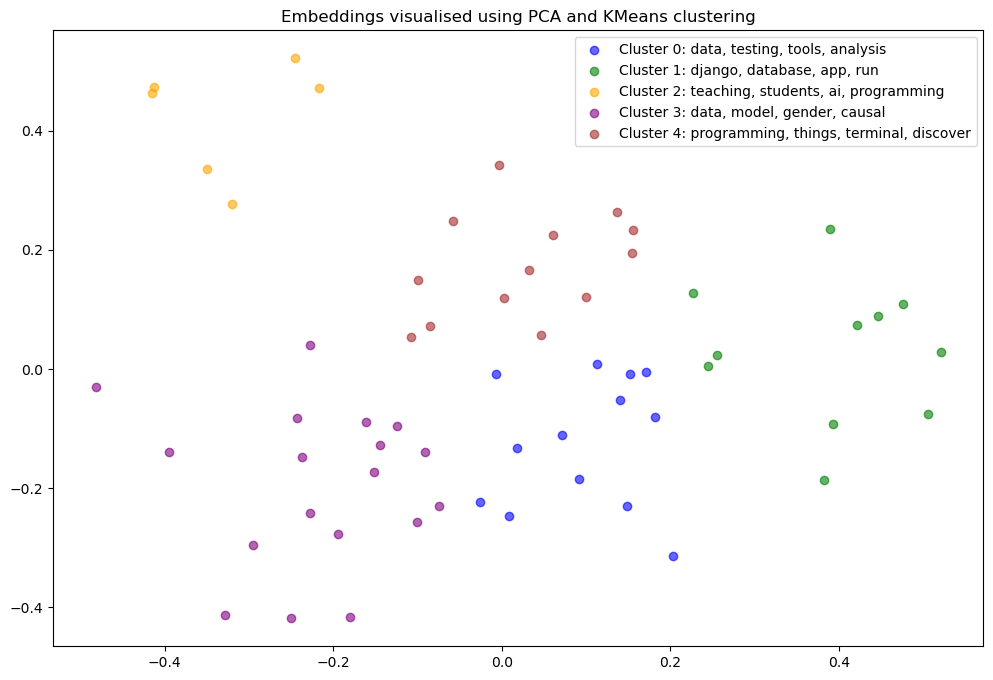

In [38]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA on the embeddings to reduce to 2 dimensions
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings.cpu().numpy())

# Perform clustering using KMeans
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(embeddings_2d)

# Create a custom stop words list
custom_stop_words = set(ENGLISH_STOP_WORDS).union({
    'python', 'pycon', 'code', 'language',
    'developers', 'talk', 'session','project', 'use', 'using', 'learn', 
    'learning', 'application', 'applications',
    'system', 'systems', 'open', 'source', 'help',
    'support', 'user', 'users', 'feature', 'features', 'time',
    'process', 'processing', 'work', 'working', 'based', 'build',
    'building', 'provide', 'provides', 'used', 'example', 'examples',
    'including', 'approach', 'introduce', 'introduction', 'understand',
    'understanding', 'technologies', 'techniques', 'best', 'practices',
    'need', 'needs', 'session', 'sessions', 'discuss', 'discussion',
    'cover', 'covers', 'explore', 'exploring', 'present', 'presentation'
})
custom_stop_words = list(custom_stop_words)  # Convert set to list

# Extract descriptions and calculate TF-IDF for identifying important words
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['Description'])

# Get feature names safely
try:
    feature_names = vectorizer.get_feature_names_out()
except AttributeError:
    feature_names = vectorizer.get_feature_names()

# Determine the top words for each cluster
cluster_keywords = {}
for cluster_id in range(num_clusters):
    cluster_indices = np.where(clusters == cluster_id)[0]
    cluster_tfidf = tfidf_matrix[cluster_indices]
    # Sum TF-IDF scores for each term within the cluster
    sum_tfidf = cluster_tfidf.sum(axis=0)
    # Convert to a 1D NumPy array
    sum_tfidf_array = np.array(sum_tfidf).flatten()
    top_indices = np.argsort(sum_tfidf_array)[::-1][:4]
    top_words = feature_names[top_indices]
    cluster_keywords[cluster_id] = ", ".join(top_words)

# Create a scatter plot for PCA with clusters
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'orange', 'purple', 'brown']
for cluster_id in range(num_clusters):
    cluster_points = embeddings_2d[clusters == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                color=colors[cluster_id],
                label=f'Cluster {cluster_id}: {cluster_keywords[cluster_id]}',
                alpha=0.6)

# # Highlight the target speech
# plt.scatter(embeddings_2d[current_speech_idx, 0],
#             embeddings_2d[current_speech_idx, 1],
#             color='red', label='Target Speech', edgecolors='black', s=150)

plt.title('Embeddings visualised using PCA and KMeans clustering')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [26]:
# Step 1: clusters already contains the cluster labels from previous code
# clusters = kmeans.fit_predict(embeddings_2d)

# Step 2: Find indices of documents in cluster 3
cluster_3_indices = np.where(clusters == 2)[0]

# Step 3: Retrieve documents from the DataFrame
cluster_3_documents = df.iloc[cluster_3_indices]

# Display the titles and descriptions of the documents in cluster 3
cluster_3_documents[['Title', 'Description']]


,Title,Description
17,Enhancing Programming Ability with Playful Lea...,Beginner programmers often struggle to underst...
21,From Hypnotised to Heretic: Immunising Society...,In an age where politicians peddle conspiracy ...
25,How Smart is AI? – Real projects to build real...,"Chat GPT is all the rage in schools, and every..."
31,Looking back to move forwards: how educational...,Learning to program can be exceptionally chall...
45,Teaching Digital Technologies in Australian sc...,"There are around 6,200 primary schools around ..."
50,Transitioning from VB to Python – Mapping a 6 ...,"In the past decade, this school has consistent..."


In [27]:
# Step 1: clusters already contains the cluster labels from previous code
# clusters = kmeans.fit_predict(embeddings_2d)

# Step 2: Find indices of documents in cluster 3
cluster_3_indices = np.where(clusters == 1)[0]

# Step 3: Retrieve documents from the DataFrame
cluster_3_documents = df.iloc[cluster_3_indices]

# Display the titles and descriptions of the documents in cluster 3
cluster_3_documents[['Title', 'Description']]


,Title,Description
0,A Lazy Person's Guide to Building REST Clients...,Sick of writing lots of dedicated methods to p...
7,Build Your Own IoT! Fun With Python and Raspbe...,This talk will discuss building a basic stream...
14,Django on AWS for chump change,Some cheap and definitely not employer approve...
15,"Django, REST and OpenAPI - a gentle introduction",Django is an all-parts-included framework that...
26,How to confirm that the index you added actual...,Database indexes allow us to speed up queries ...
36,Notes on Over-Engineering: A Project Post-Mortem,Join me for a retrospective on a reusable Djan...
43,Simplifying Python Web App Operations: Automat...,After creating a great web app using Python su...
44,Space Django: Migrating and Redesigning a Data...,Being a fast-paced startup and developing a co...
47,The perfect setup? Not setup.py! Building pack...,Everyone loves package management! Python's pa...
48,Three Django Apps in a Trenchcoat: Writing an ...,Come and hear how I wrote 3 Django apps in a t...
